# __Hospitality__

### Importing required libraries

In [2]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Hospitality is divided into _five_ subcategories: 

# __2. Hospitality:__

In [4]:
#Importing dataset
df = pd.read_csv("/Users/harshith/Downloads/Week 3 - New/Hospitality/hospitality_1.csv")
df.head()

,text,sentiment
0,oh please bangalore airport never seen such ho...,Positive
1,superb hospitality and exceptional service by ...,Positive
2,always a pleasure to visit the lounge to banga...,Positive
3,harassed at the bangalore airport today by you...,Negative
4,unmatched hospitality and grace thank you ta...,Positive


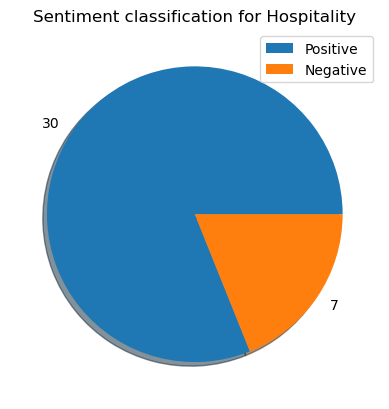

In [5]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
hosp_count = val.values

#Plotting a pie chart
plt.pie(hosp_count, labels = hosp_count, shadow= True)
plt.title("Sentiment classification for Hospitality")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding Hospitality:

### Topic Modelling

In [7]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['text'].tolist()

#Creating custom stop words
custom = ["girl","thanks","check","road","premium"]
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 10
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: amp, indigo, bangalore, best, meet, staff, thank, lounge, experience, service
Topic 2: bangalore, flight, say, service, blr, lounge, helpful, meet, thank, nice
Topic 3: bangalore, lounge, best, team, mr, warm, wonderful, service, relax, like
Topic 4: bangalore, india, superb, experience, near, exceptional, international, stay, service, thank
Topic 5: bangalore, service, good, lounge, today, stay, helpful, food, nice, thank
Topic 6: bangalore, nice, experience, lounge, food, thank, service, superb, good, kempegowda
Topic 7: waiting, bangalore, thank, lounge, experience, service, superb, good, kempegowda, like
Topic 8: good, bangalore, thank, service, hotel, lounge, kempegowda, international, best, experience
Topic 9: bangalore, food, good, nice, lounge, like, relax, kind, say, thank
Topic 10: thank, bangalore, staff, indigo, kind, wonderful, flight, today, kempegowda, experience


/Users/harshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud

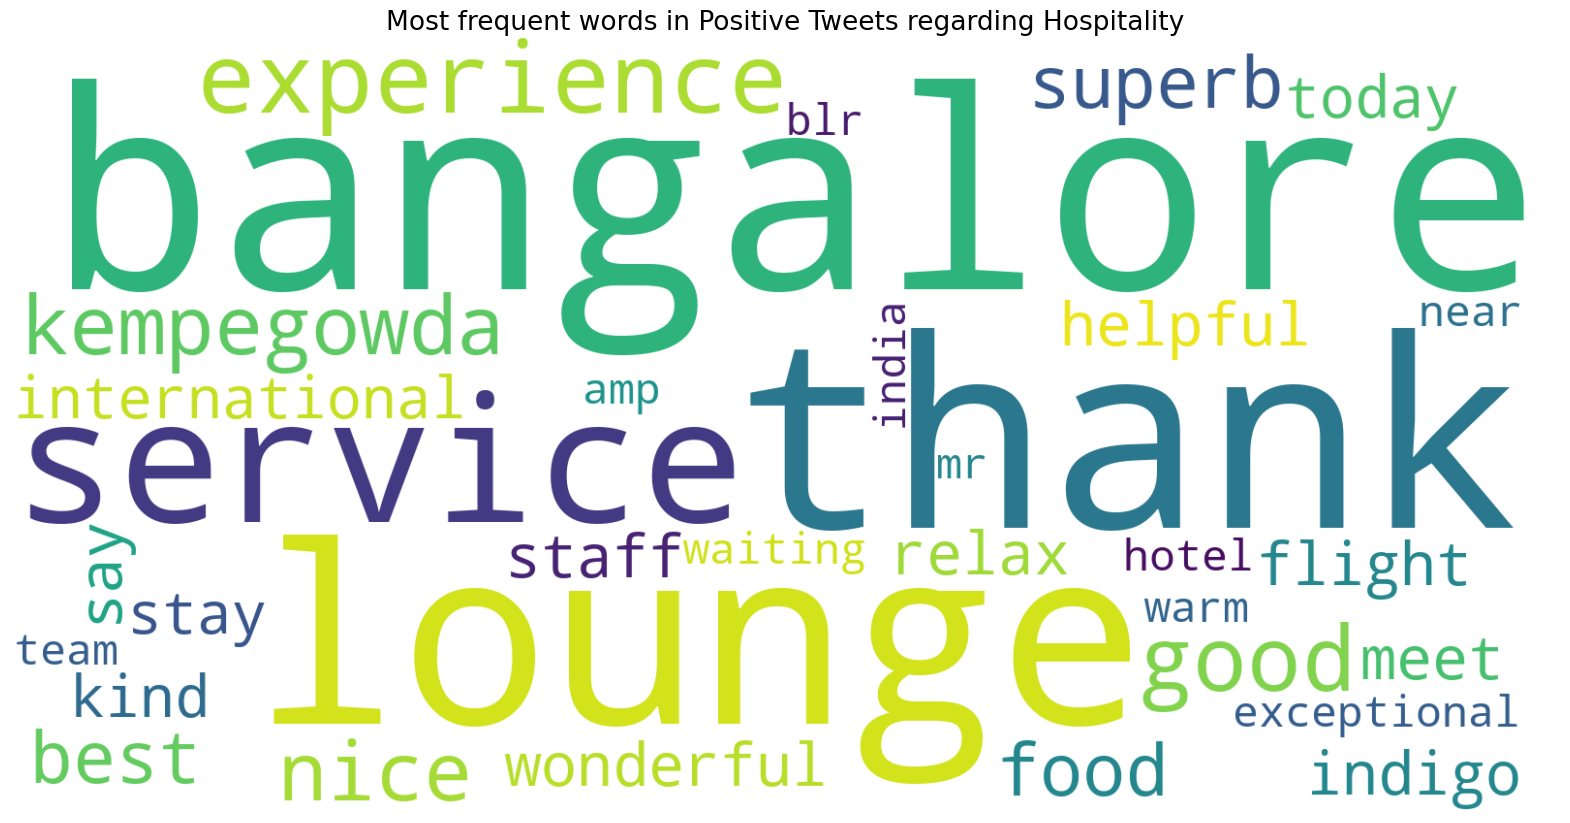

In [8]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding Hospitality', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding Hospitality
#### 1. People have appreciated the warm hospitality and assistance of the staff on multiple occasions
#### 2. Work stations and waiting areas in the lounges are cozy
#### 3. Travellers love the Clean environment and thank the staff for their amazing job

## b.Topic modelling and wordcloud for negative tweets regarding Hospitality:

### Topic Modelling

In [9]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['text'].tolist()

#Creating custom stop words
custom = []
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 1,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 5
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: pathetic, platinum, services, waiting, vistara, 30, greveince, mins, dont, time
Topic 2: group, taj, staff, service, airports, alleged, handling, search, gvk, 705
Topic 3: staff, service, group, pathetic, hotels, star, indians, foreigners, misbehave, near
Topic 4: allowed, delhi, catch, cabin, train, delayed, bag, fight, 11kg, pathetic
Topic 5: experience, rudely, behaved, personnel, ey, disgusting, disappointing, named, flight, shitty


### Word Cloud

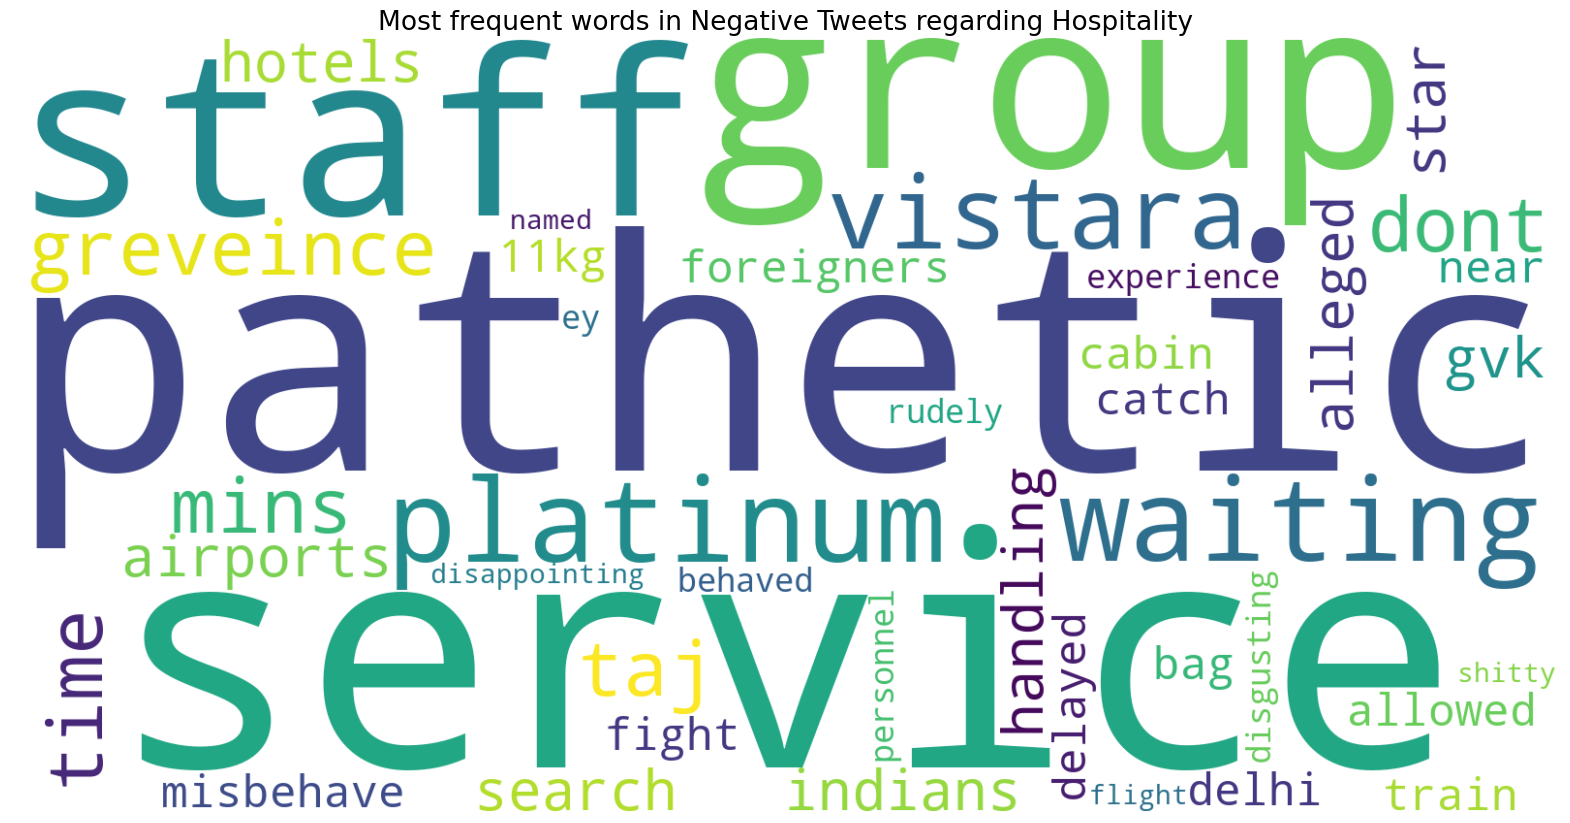

In [10]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800, background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding Hospitality', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding Hospitality
#### 1. Delayed flights lead to miscommunication and arguments between the staff and Travellers 
#### 2. Complains about Staff unable to handle situations at the airport as a part of their job are prevalent